## Deep Learning
Clase 1 - Ejercicios

1. Modelo lineal (ej. detector de gas)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[0,0,1],
              [0,1,1],
              [1,0,1],
              [1,1,1]])

y = np.array([0,1,1,0]).reshape(-1,1)

In [3]:
w = np.linalg.inv(X.T @ X) @ X.T @ y 
# @ == np.dot()
print('w1_hat:', w[0], '\nw2_hat:', w[1], '\nw0_hat:', w[2])

w1_hat: [1.66533454e-16] 
w2_hat: [5.55111512e-17] 
w0_hat: [0.5]


In [4]:
y_hat = X @ w

In [5]:
n = X.shape[0]
mse = np.sum((y - y_hat) ** 2) / n # loss function
mse

0.25

2. XOR con modelo no lineal

Componentes (de todo modelo):
* Modelo (algoritmo + data) -> **Forward**
* **Loss** function (medir, entrenar) -> **Backward**
* Optimizador (mejor aproximación) -> **Gradiente** -> **Ws update**

In [6]:
X = np.array([[0,0,1],
              [0,1,1],
              [1,0,1],
              [1,1,1]])

#X = np.array([[0,0],
#              [0,1],
#              [1,1],
#              [1,1]]) # original, no b0

y = np.array([0,1,1,0]).reshape(-1,1)

Estructura:
* X -> 2 neuronas -> layer 1 -> 1 neurona -> layer 2 == y_hat

In [11]:
# Stochastic Gradient Descent -> batch = 1

np.random.seed(101)
n_samples = X.shape[0] # ídem y.shape[0]
m_features = X.shape[1] # incluye columna de unos para dar lugar a b0
m_weigthsL2 = 2 + 1 # 2 neuronas en L1 + 1 b0

# hyperparameters
epochs = 1000
lr = 0.01

# performance
wlist = []

# función de activación
def sigmoid(z):
    return (1 / (1 + np.exp(-z))) 

for e in range(epochs):
    for i in range(n_samples):
        # ----------------------------------------------------- 1. forward
        # layer 1
        w1L1 = np.zeros((m_features,1)) # inicializo pesos, mx1
        w2L1 = np.random.randn(m_features).reshape(m_features, 1) 

        z1L1 = X[i,:] @ w1L1 # estimo c/3 parámetros
        a1L1 = sigmoid(z1L1)

        z2L1 = X[i,:] @ w2L1 # estimo c/3 parámetros
        a2L1 = sigmoid(z2L1)
        
        outL1 = np.vstack((a1L1, a2L1, 1)).T
        #print(a1L1, z1L1, '\n', a2L1, z2L1, '\n', outL1)

        # layer 2 -> final estimation
        w1L2 = np.random.randn(m_weigthsL2).reshape(m_weigthsL2, 1) 

        # outputL2 == z1L2 == y_hat
        y_hat = outL1 @ w1L2 # estimo c/3 parámetros
        # omito función de activación, cual regresión p/no restringir valores
        #y_hat = sigmoid(outputL1)
              
        # ----------------------------------------------------- 2. loss & backwards
        error = y[i] - y_hat
        mse = error ** 2
        
        # ----------------------------------------------------- 3. optimizer & Ws update
        #lr += 0.0002
        gradient = -2 * error * outL1  *  (outL1 * (1 - outL1)) * X[i,:]
        # mx1
        w1L2 = w1L2 - (lr * gradient.T) # weights update, mx1
  
    wlist.append(w1L2)

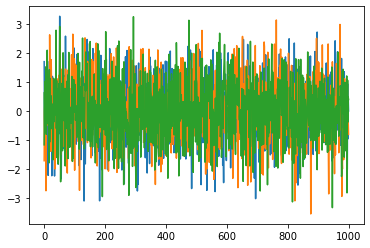

In [12]:
wlist = np.array(wlist).reshape(epochs, 3)
for i in range(3):
    plt.plot(wlist.T[i])